# CGNN Example on the LUCAS (LUng CAncer Simple set) dataset 
## Numerical Dataset with the same structure as LUCAS.

Source : www.causality.inf.ethz.ch/data/LUCAS.html

The true dataset is the **lucas0_train.csv** file ; we use the **NUM_LUCAS.csv** file, representing a graph with continuous data which structure is the same as the true LUCAS dataset.
**Goal** : Find the causal structure of the graph using CGNN, starting from the raw data.

In [1]:
#Import libraries
import cdt
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
#Hardware parameters
cdt.SETTINGS.GPU = True
if cdt.SETTINGS.GPU_LIST == [] and cdt.SETTINGS.GPU:
    cdt.SETTINGS.GPU_LIST = [0,1]
    
if cdt.SETTINGS.GPU:
    cdt.SETTINGS.NB_JOBS = len(cdt.SETTINGS.GPU_LIST)*2
#Settings for CGNN
cdt.CGNN_SETTINGS.use_Fast_MMD = False
cdt.CGNN_SETTINGS.NB_RUNS = 8
cdt.CGNN_SETTINGS.NB_MAX_RUNS = 16

#Settings for Feature Selection
cdt.CGNN_SETTINGS.nb_run_feature_selection = 1
cdt.CGNN_SETTINGS.regul_param = 0.006
cdt.CGNN_SETTINGS.threshold_UMG = 0.16
cdt.SETTINGS.verbose = False

/users/ao/diviyan/miniconda2/envs/p3-gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/users/ao/diviyan/Documents/CDT/CausalDiscoveryToolbox/cdt/utils/Settings.py:121: UserWarning: No GPU automatically detected. Set SETTINGS.GPU to false,SETTINGS.GPU_LIST to [], and SETTINGS.NB_JOBS to cpu_count.
  "SETTINGS.GPU_LIST to [], and SETTINGS.NB_JOBS to cpu_count.")
/users/ao/diviyan/Documents/CDT/CausalDiscoveryToolbox/cdt/utils/R.py:37: UserWarning: R wrapper is not available : No module named 'rpy2'
  warnings.warn("R wrapper is not available : {}".format(e))


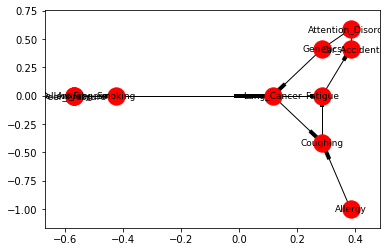

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [2]:
# Load data and graph solution
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.DirectedGraph(pd.read_csv("Lucas_graph.csv"))  
solution.plot() # The plot function allows for quick visualization of the graph. 
# For a more detailed view of the network, please use the .to_list() function to export the graph to another format  
# importable by other libraries (graphviz, gephi).
data.head()

500
500
Feature selection for target Allergy
Feature selection for target Anxiety
500
Feature selection for target Genetics
500
Feature selection for target Peer_Pressure
500
Feature selection for target Attention_Disorder
500
Feature selection for target Smoking
500
Feature selection for target Lung_Cancer
500
Feature selection for target Yellow_Fingers
500
Feature selection for target Coughing
500
Feature selection for target Fatigue
500
Feature selection for target Car_Accident
--- Execution time : 95.61126661300659 seconds ---


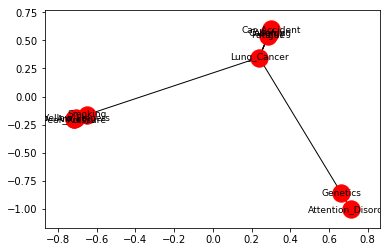

,0,1,2
0,Allergy,Fatigue,0.176032
1,Lung_Cancer,Smoking,0.192302
2,Lung_Cancer,Genetics,0.198144
3,Lung_Cancer,Car_Accident,0.210105
4,Lung_Cancer,Coughing,0.269206
5,Allergy,Lung_Cancer,0.334688
6,Coughing,Fatigue,0.385348
7,Fatigue,Car_Accident,0.423851
8,Anxiety,Peer_Pressure,0.509613
9,Lung_Cancer,Fatigue,0.548724


In [3]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN
Fsgnn = FSGNN()
start_time = time.time()
ugraph = Fsgnn.create_skeleton_from_data(data)
print("--- Execution time : %s seconds ---" % (time.time() - start_time))
ugraph.plot()
# List results
pd.DataFrame(ugraph.list_edges())

{'Allergy': 'Numerical', 'Anxiety': 'Numerical', 'Genetics': 'Numerical', 'Peer_Pressure': 'Numerical', 'Attention_Disorder': 'Numerical', 'Smoking': 'Numerical', 'Lung_Cancer': 'Numerical', 'Yellow_Fingers': 'Numerical', 'Coughing': 'Numerical', 'Fatigue': 'Numerical', 'Car_Accident': 'Numerical'}


/users/ao/diviyan/Documents/CDT/CausalDiscoveryToolbox/cdt/causality/graph/CGNN.py:737: UserWarning: The pairwise GNN model is computed on each edge of the UMG to initialize the model and start CGNN with a DAG
  warnings.warn("The pairwise GNN model is computed on each edge of the UMG "


{'Allergy': {'Fatigue', 'Coughing', 'Lung_Cancer'}, 'Fatigue': {'Car_Accident', 'Lung_Cancer'}, 'Lung_Cancer': {'Car_Accident'}, 'Coughing': {'Fatigue', 'Lung_Cancer'}, 'Smoking': {'Yellow_Fingers', 'Lung_Cancer'}, 'Yellow_Fingers': set(), 'Genetics': {'Attention_Disorder', 'Lung_Cancer'}, 'Attention_Disorder': set(), 'Car_Accident': set(), 'Anxiety': {'Peer_Pressure', 'Smoking'}, 'Peer_Pressure': {'Smoking'}}
Pair:0, Run:1, Iter:0, score:4.9165239334106445
Pair:0, Run:2, Iter:0, score:4.867126941680908
Pair:0, Run:0, Iter:0, score:4.881712913513184
Pair:0, Run:3, Iter:0, score:4.963436603546143
Pair:0, Run:1, Iter:500, score:0.03244674205780029
Pair:0, Run:2, Iter:500, score:0.032420337200164795
Pair:0, Run:3, Iter:500, score:0.03192872554063797
Pair:0, Run:0, Iter:500, score:0.02812848426401615
Pair:0, Run:2, Iter:0, score:0.02809305302798748
Pair:0, Run:1, Iter:0, score:0.029012203216552734
Pair:0, Run:3, Iter:0, score:0.029719935730099678
Pair:0, Run:0, Iter:0, score:0.032879840582

Pair:2, Run:8, Iter:0, score:4.902559280395508
Pair:2, Run:9, Iter:500, score:0.027870498597621918
Pair:2, Run:8, Iter:500, score:0.026561856269836426
Pair:2, Run:10, Iter:500, score:0.025756729766726494
Pair:2, Run:11, Iter:500, score:0.02550707571208477
Pair:2, Run:9, Iter:0, score:0.03136133775115013
Pair:2, Run:8, Iter:0, score:0.026443000882864
Pair:2, Run:11, Iter:0, score:0.02606169879436493
Pair:2, Run:10, Iter:0, score:0.02473936602473259
Pair:2, Run:13, Iter:0, score:4.889547824859619
Pair:2, Run:14, Iter:0, score:4.9306559562683105
Pair:2, Run:12, Iter:0, score:4.91818380355835
Pair:2, Run:15, Iter:0, score:4.919799327850342
Pair:2, Run:13, Iter:500, score:0.02602223865687847
Pair:2, Run:14, Iter:500, score:0.02715165540575981
Pair:2, Run:12, Iter:500, score:0.025887297466397285
Pair:2, Run:15, Iter:500, score:0.02646491304039955
Pair:2, Run:13, Iter:0, score:0.02492477372288704
Pair:2, Run:14, Iter:0, score:0.026677891612052917
Pair:2, Run:12, Iter:0, score:0.02591547742486

Pair:7, Run:10, Iter:500, score:0.02230396866798401
Pair:7, Run:8, Iter:0, score:0.03335808962583542
Pair:7, Run:11, Iter:0, score:0.022580530494451523
Pair:7, Run:9, Iter:0, score:0.024243220686912537
Pair:7, Run:10, Iter:0, score:0.021738044917583466
Pair:7, Run:12, Iter:0, score:4.874323844909668
Pair:7, Run:15, Iter:0, score:4.939755916595459
Pair:7, Run:14, Iter:0, score:4.864499092102051
Pair:7, Run:13, Iter:0, score:4.882765293121338
Pair:7, Run:12, Iter:500, score:0.02200428582727909
Pair:7, Run:15, Iter:500, score:0.02214236557483673
Pair:7, Run:14, Iter:500, score:0.02803446725010872
Pair:7, Run:13, Iter:500, score:0.02381316013634205
Pair:7, Run:12, Iter:0, score:0.022957248613238335
Pair:7, Run:15, Iter:0, score:0.021543823182582855
Pair:7, Run:14, Iter:0, score:0.022538959980010986
Pair:7, Run:13, Iter:0, score:0.022941581904888153
Current score : 0.02369759934558533
Best score : 0.02374017174472101
P-value : 0.9158540314330085
Edge ['Coughing', 'Fatigue', 0.08249083687073

Pair:11, Run:8, Iter:0, score:0.022550776600837708
Pair:11, Run:13, Iter:0, score:4.896251678466797
Pair:11, Run:14, Iter:0, score:4.902835845947266
Pair:11, Run:12, Iter:0, score:4.912138938903809
Pair:11, Run:15, Iter:0, score:4.920401096343994
Pair:11, Run:13, Iter:500, score:0.02275783196091652
Pair:11, Run:14, Iter:500, score:0.022529257461428642
Pair:11, Run:12, Iter:500, score:0.023987485095858574
Pair:11, Run:15, Iter:500, score:0.02365097589790821
Pair:11, Run:13, Iter:0, score:0.02204975299537182
Pair:11, Run:14, Iter:0, score:0.02193024381995201
Pair:11, Run:15, Iter:0, score:0.023475436493754387
Pair:11, Run:12, Iter:0, score:0.026030676439404488
Current score : 0.02379508803365752
Best score : 0.023405441284645348
P-value : 0.04548268123812533
Edge ['Genetics', 'Lung_Cancer', 0.17444773652163217] in evaluation :
Pair:12, Run:2, Iter:0, score:4.923599720001221
Pair:12, Run:1, Iter:0, score:4.917994499206543
Pair:12, Run:3, Iter:0, score:4.914167404174805
Pair:12, Run:0, Ite

Pair:1, Run:6, Iter:0, score:4.925723075866699
Pair:1, Run:7, Iter:0, score:4.916562080383301
Pair:1, Run:4, Iter:500, score:0.022170092910528183
Pair:1, Run:5, Iter:500, score:0.023716937750577927
Pair:1, Run:6, Iter:500, score:0.02276524156332016
Pair:1, Run:7, Iter:500, score:0.023775286972522736
Pair:1, Run:4, Iter:0, score:0.023081369698047638
Pair:1, Run:5, Iter:0, score:0.023645929992198944
Pair:1, Run:6, Iter:0, score:0.022359926253557205
Pair:1, Run:7, Iter:0, score:0.023415323346853256
Pair:1, Run:11, Iter:0, score:4.90496826171875
Pair:1, Run:9, Iter:0, score:4.914381980895996
Pair:1, Run:8, Iter:0, score:4.942498207092285
Pair:1, Run:10, Iter:0, score:4.928079128265381
Pair:1, Run:11, Iter:500, score:0.024590035900473595
Pair:1, Run:9, Iter:500, score:0.024578679352998734
Pair:1, Run:8, Iter:500, score:0.024937843903899193
Pair:1, Run:10, Iter:500, score:0.022471921518445015
Pair:1, Run:9, Iter:0, score:0.022480085492134094
Pair:1, Run:11, Iter:0, score:0.02360789105296135


Pair:6, Run:4, Iter:0, score:0.02436826564371586
Pair:6, Run:7, Iter:0, score:0.024517623707652092
Current score : 0.02443640725966543
Best score : 0.023405441284645348
P-value : 0.002205847599561095
Edge ['Fatigue', 'Coughing', 0.08249083687073533] in evaluation :
Pair:7, Run:3, Iter:0, score:4.923065662384033
Pair:7, Run:1, Iter:0, score:4.870006561279297
Pair:7, Run:0, Iter:0, score:4.872282028198242
Pair:7, Run:2, Iter:0, score:4.8922905921936035
Pair:7, Run:3, Iter:500, score:0.02477717585861683
Pair:7, Run:2, Iter:500, score:0.024742357432842255
Pair:7, Run:1, Iter:500, score:0.02594851516187191
Pair:7, Run:0, Iter:500, score:0.02563931792974472
Pair:7, Run:3, Iter:0, score:0.025940867140889168
Pair:7, Run:2, Iter:0, score:0.022122062742710114
Pair:7, Run:1, Iter:0, score:0.024456065148115158
Pair:7, Run:0, Iter:0, score:0.021330446004867554
Pair:7, Run:4, Iter:0, score:4.8752031326293945
Pair:7, Run:5, Iter:0, score:4.859921455383301
Pair:7, Run:7, Iter:0, score:4.89525604248046

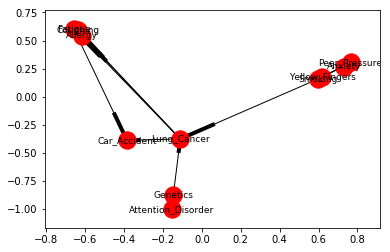

[['Lung_Cancer', 'Fatigue', 0.0011554227462270514], ['Anxiety', 'Peer_Pressure', 0.014807191234801039], ['Fatigue', 'Car_Accident', 0.017659567909042908], ['Lung_Cancer', 'Coughing', 0.024168466566031638], ['Lung_Cancer', 'Allergy', 0.04188956309294336], ['Lung_Cancer', 'Car_Accident', 0.0465599246720154], ['Smoking', 'Lung_Cancer', 0.07848789114386763], ['Fatigue', 'Coughing', 0.08249083687073533], ['Smoking', 'Peer_Pressure', 0.09205852846364362], ['Allergy', 'Coughing', 0.10089131504792169], ['Smoking', 'Anxiety', 0.11941762665941599], ['Allergy', 'Fatigue', 0.1516995923185177], ['Genetics', 'Lung_Cancer', 0.17444773652163217], ['Genetics', 'Attention_Disorder', 0.3732707689715552], ['Smoking', 'Yellow_Fingers', 0.6446975804690955]]


In [5]:
# Orient the edges of the graph
from cdt.causality.graph import CGNN
Cgnn = CGNN(backend="TensorFlow")
start_time = time.time()
dgraph = Cgnn.predict(data, graph=ugraph)
print("--- Execution time : %s seconds ---" % (time.time() - start_time))

# Plot the output graph
dgraph.plot()
# Print output results : 
print(dgraph.list_edges())
# Data can be generated using the graph output, with the method CGNN_generator_tf from cdt.generators.generators


In [6]:
pd.DataFrame(dgraph.list_edges(), columns=['Cause', 'Effect', 'Score'])

,Cause,Effect,Score
0,Lung_Cancer,Fatigue,0.001155
1,Anxiety,Peer_Pressure,0.014807
2,Fatigue,Car_Accident,0.017660
3,Lung_Cancer,Coughing,0.024168
4,Lung_Cancer,Allergy,0.041890
5,Lung_Cancer,Car_Accident,0.046560
6,Smoking,Lung_Cancer,0.078488
7,Fatigue,Coughing,0.082491
8,Smoking,Peer_Pressure,0.092059
9,Allergy,Coughing,0.100891
